In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [8]:
df = pd.read_csv('../data/market_value.csv')
df.head()

,x,y,mw,datum_mw,verein,age,wappen,player_id,player_name
0,1.202425e+12,50000.0,€50k,"Feb 8, 2008",Cruzeiro Esporte Clube,18,https://tmssl.akamaized.net//images/wappen/pro...,68097,Rafael
1,1.229036e+12,200000.0,€200k,"Dec 12, 2008",Cruzeiro Esporte Clube,19,NaN,68097,Rafael
2,1.254694e+12,800000.0,€800k,"Oct 5, 2009",Cruzeiro Esporte Clube,20,NaN,68097,Rafael
3,1.271282e+12,600000.0,€600k,"Apr 15, 2010",Cruzeiro Esporte Clube,20,NaN,68097,Rafael
4,1.275775e+12,300000.0,€300k,"Jun 6, 2010",Cruzeiro Esporte Clube,20,NaN,68097,Rafael


In [10]:
df.columns

Index(['x', 'y', 'mw', 'datum_mw', 'verein', 'age', 'wappen', 'player_id',
       'player_name'],
      dtype='object')

In [22]:
a = df['verein'].unique()

In [26]:
for _ in a:
    if _.startswith('Cear'):
        print(_)

Ceará Sporting Club
Ceará SC U20


In [28]:
df_csc = df[df['verein'] == 'Ceará Sporting Club']

In [30]:
df_csc.describe

<bound method NDFrame.describe of                   x          y      mw      datum_mw               verein  \
230    1.690236e+12  1000000.0  €1.00m  Jul 25, 2023  Ceará Sporting Club   
553    1.639696e+12   450000.0   €450k  Dec 17, 2021  Ceará Sporting Club   
554    1.649196e+12   450000.0   €450k   Apr 6, 2022  Ceará Sporting Club   
555    1.660860e+12   450000.0   €450k  Aug 19, 2022  Ceará Sporting Club   
556    1.668380e+12   450000.0   €450k  Nov 14, 2022  Ceará Sporting Club   
...             ...        ...     ...           ...                  ...   
32948  1.660860e+12   200000.0   €200k  Aug 19, 2022  Ceará Sporting Club   
32949  1.668380e+12   200000.0   €200k  Nov 14, 2022  Ceará Sporting Club   
32990  1.527026e+12   500000.0   €500k  May 23, 2018  Ceará Sporting Club   
33005  1.469225e+12   300000.0   €300k  Jul 23, 2016  Ceará Sporting Club   
33032  1.550444e+12   500000.0   €500k  Feb 18, 2019  Ceará Sporting Club   

       age                               

In [32]:
df_csc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 230 to 33032
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   x            321 non-null    float64
 1   y            321 non-null    float64
 2   mw           321 non-null    object 
 3   datum_mw     321 non-null    object 
 4   verein       321 non-null    object 
 5   age          321 non-null    int64  
 6   wappen       112 non-null    object 
 7   player_id    321 non-null    int64  
 8   player_name  321 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 25.1+ KB


In [49]:
def convert_money(value):
    value = value.replace('€', '')
    if value == '-' or value == '':
        return 0
    if 'm' in value:
        return float(value.replace('m', '')) * 1000000
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    else: 
        float(value)

In [50]:
df_csc['mk_value'] = df_csc['mw'].apply(convert_money)

/tmp/ipykernel_8149/1806603724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csc['mk_value'] = df_csc['mw'].apply(convert_money)


In [56]:
df_csc_sorted = df_csc[['player_name', 'mw', 'mk_value']].sort_values(by='mk_value', ascending=False)

In [57]:
df_csc_sorted[df_csc_sorted['player_name'] == 'Erick Pulga']

,player_name,mw,mk_value
14594,Erick Pulga,€1.00m,1000000.0
14593,Erick Pulga,€150k,150000.0
14592,Erick Pulga,€150k,150000.0


In [66]:
championship_df = pd.read_csv('../data/partidas_sofascore.csv')

In [67]:
championship_df = championship_df[championship_df['Campeonato'] == 'Brasileirão Série B']

In [233]:
statistics_game_df = pd.read_csv('../data/statistics_game.csv')

In [129]:
statistics_game_df[(statistics_game_df['home_team'] == 'Ceará') | (statistics_game_df['away_team'] == 'Ceará')].sort_values(by='data_jogo', ascending=False)

,id_partida,data_jogo,campeonato,home_team,away_team,period,group,name,home_value,away_value,home_total,away_total,compare_code,key,resultado
102466,12146496,2024-10-12,Brasileirão Série B,Ceará,Ponte Preta,2ND,Goalkeeping,Goal kicks,2.0,5.0,NaN,NaN,2,goalKicks,Ceará venceu
102380,12146496,2024-10-12,Brasileirão Série B,Ceará,Ponte Preta,ALL,Passes,Crosses,5.0,2.0,24.0,13.0,1,accurateCross,Ceará venceu
102383,12146496,2024-10-12,Brasileirão Série B,Ceará,Ponte Preta,ALL,Duels,Ground duels,42.0,39.0,81.0,81.0,1,groundDuelsPercentage,Ceará venceu
102384,12146496,2024-10-12,Brasileirão Série B,Ceará,Ponte Preta,ALL,Duels,Aerial duels,19.0,8.0,27.0,27.0,1,aerialDuelsPercentage,Ceará venceu
102385,12146496,2024-10-12,Brasileirão Série B,Ceará,Ponte Preta,ALL,Duels,Dribbles,8.0,8.0,18.0,16.0,2,dribblesPercentage,Ceará venceu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,12146209,2024-04-20,Brasileirão Série B,Ceará,Goiás,2ND,Match overview,Corner kicks,7.0,0.0,NaN,NaN,1,cornerKicks,NaN
3556,12146209,2024-04-20,Brasileirão Série B,Ceará,Goiás,2ND,Match overview,Passes,215.0,118.0,NaN,NaN,1,passes,NaN
3557,12146209,2024-04-20,Brasileirão Série B,Ceará,Goiás,2ND,Match overview,Tackles,9.0,6.0,NaN,NaN,1,totalTackle,NaN
3558,12146209,2024-04-20,Brasileirão Série B,Ceará,Goiás,2ND,Match overview,Free kicks,5.0,6.0,NaN,NaN,2,freeKicks,NaN


In [284]:
statistics_player_df = pd.read_csv('../data/statistics_player.csv')

In [285]:
statistics_player_df = statistics_player_df[(statistics_player_df['position'].isin(['F', 'M']) ) & (statistics_player_df['team_name'] == 'Ceará')]
pd.set_option('display.max_columns', None)

In [287]:
statistics_player_df['minutesPlayed']

1378     64.0
1379     90.0
1380     64.0
1381     81.0
1382     17.0
         ... 
39741    13.0
39743     1.0
39748     NaN
39749     NaN
39750     NaN
Name: minutesPlayed, Length: 404, dtype: float64

In [247]:
metrics = ['goals', 'goalAssist', 'accuratePass', 'totalTackle', 'rating']
num_vars = len(metrics)

In [295]:
agg_metrics = statistics_player_df.groupby('name').agg({
    'goals': 'sum',
    'goalAssist': 'sum',
    'accuratePass': 'sum',
    'totalTackle': 'sum',
    'rating': 'mean',
    'minutesPlayed': 'sum'
}).reset_index()

In [299]:
agg_metrics = agg_metrics[agg_metrics['minutesPlayed'] > agg_metrics['minutesPlayed'].mean()]

In [302]:
# values = statistics_player_df[metrics].values
# values = np.nan_to_num(values)

# # normalizacao entre 0 e 1
# min_values = np.min(values, axis=0)
# max_values = np.max(values, axis=0)

# normalized_values = (values - min_values) / (max_values - min_values)


# normalized_values = np.concatenate((normalized_values, normalized_values[:, [0]]), axis=1)
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# angles += angles[:1]

In [ ]:
# fig, ax = plt.subplots(figsize=(24, 8), subplot_kw=dict(polar=True))
# for i in range(len(statistics_player_df)):
#     ax.fill(angles, normalized_values[i], alpha=0.25)
#     ax.plot(angles, normalized_values[i])



# plt.legend(statistics_player_df['name'], loc='upper right')
# ax.set_yticklabels([])
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(metrics)
# plt.title('Desempenho dos Jogadores (normalizado)')
# plt.show()

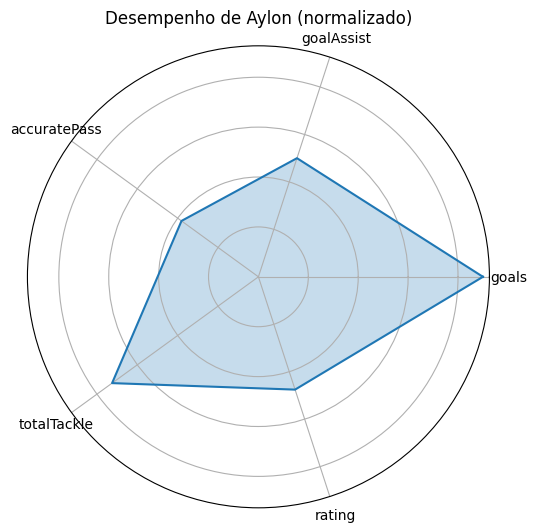

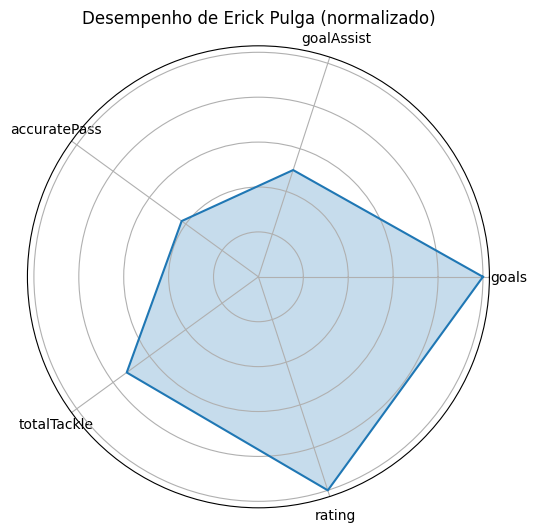

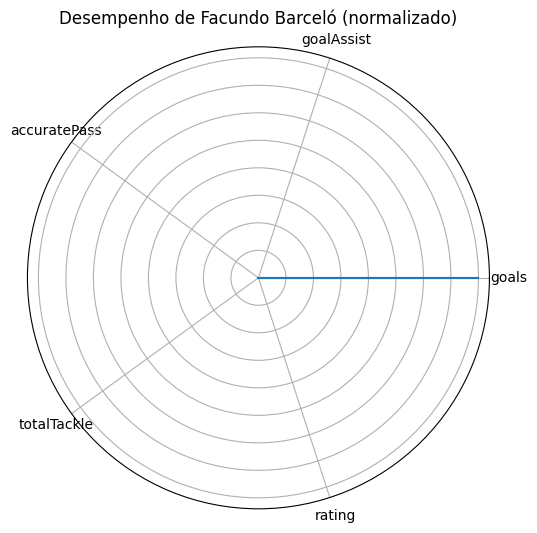

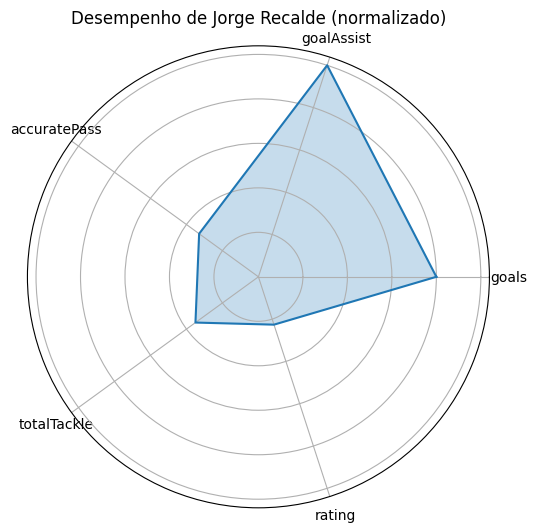

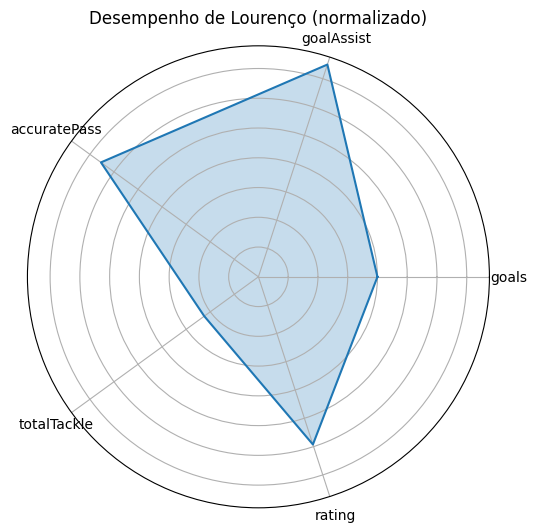

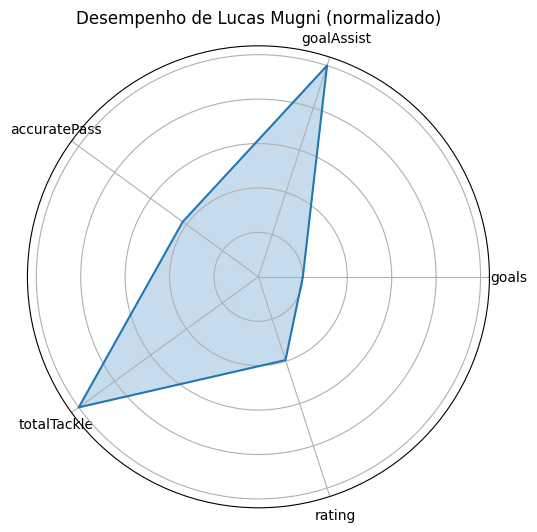

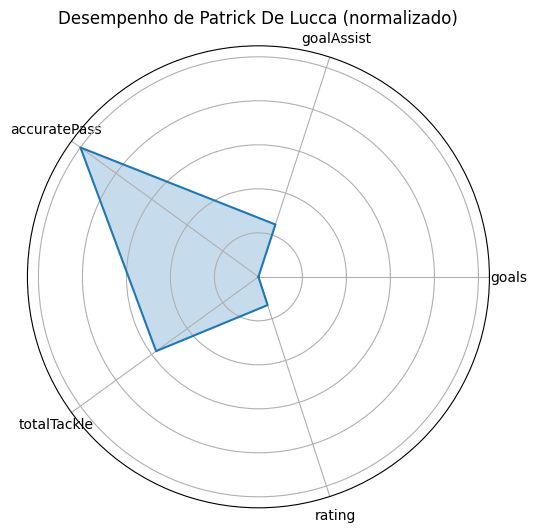

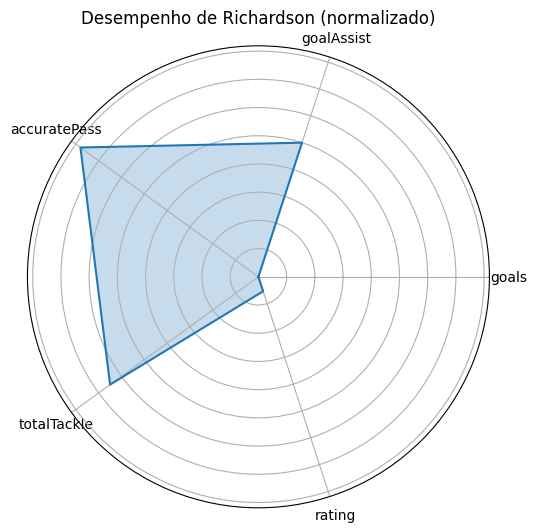

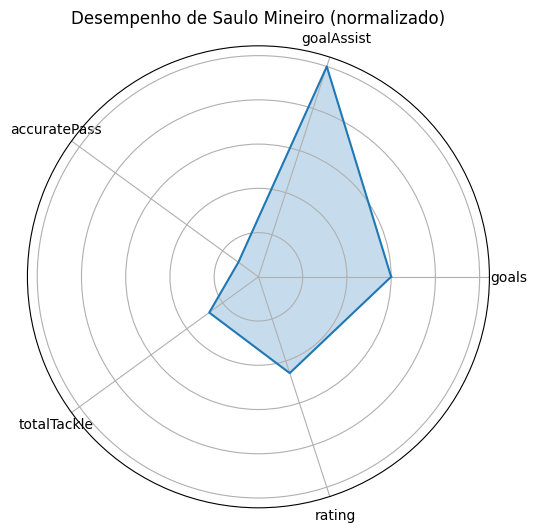

In [304]:
for index, player in agg_metrics.iterrows():
    values = player[metrics].values
    values = np.nan_to_num(values)

    # Normalização
    min_values = agg_metrics[metrics].min().values
    max_values = agg_metrics[metrics].max().values
    normalized_values = (values - min_values) / (max_values - min_values)

    normalized_values = np.concatenate((normalized_values, [normalized_values[0]]))
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, normalized_values, alpha=0.25)
    ax.plot(angles, normalized_values)


    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    plt.title(f'Desempenho de {player["name"]} (normalizado)')
    plt.show()